#Prepared by Tamal Acharya

Overview of Amazon Bedrock, highlighting its integration with models.

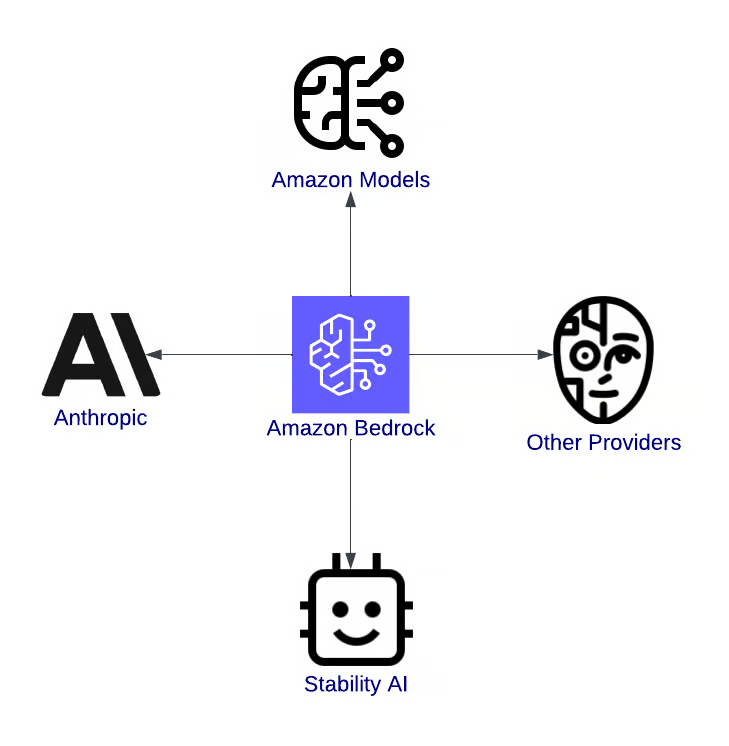

#Setting Up AWS Bedrock

This section will guide you through setting up the necessary permissions, creating an AWS account, and getting started with AWS Bedrock.

##Step 1: Creating an AWS account (if not already done)

If you don’t already have one, head to AWS’s sign-up page and create an account. For existing users, ensure your IAM user has administrator privileges.

The AWS sign-up page, showcasing Free Tier product exploration for new accounts.

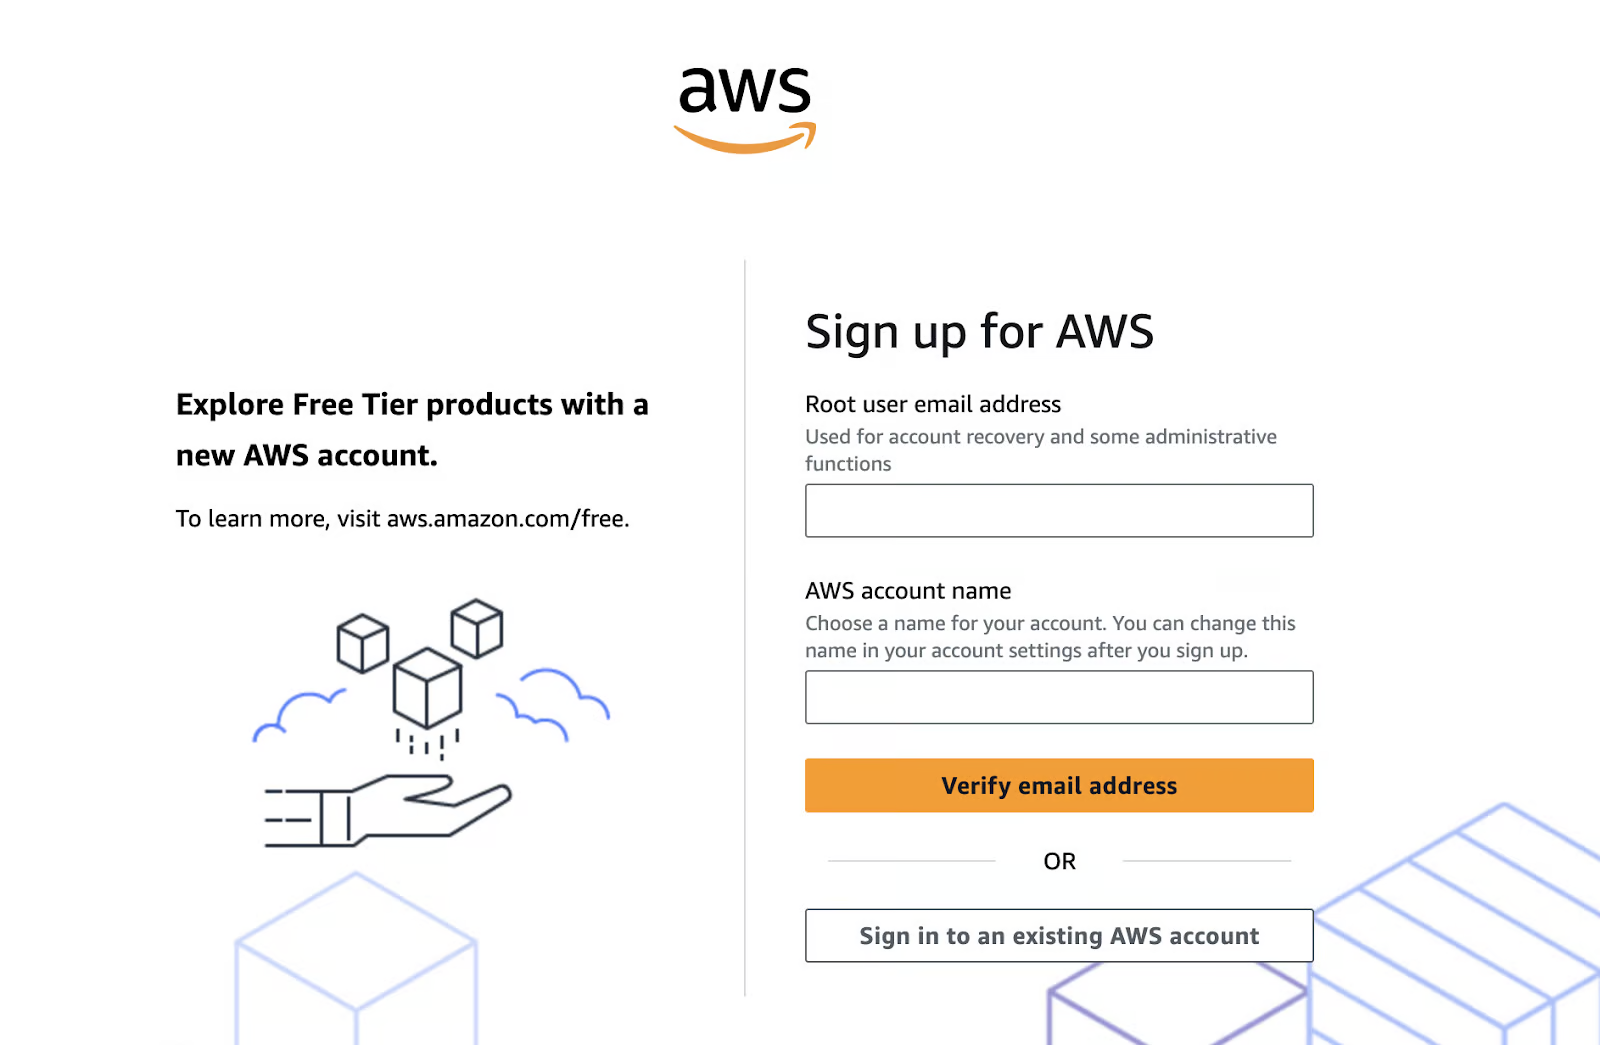

If you are looking for detailed steps, please visit AWS's official guide. https://aws.amazon.com/resources/create-account/


##Step 2: Navigating to AWS Bedrock

Amazon Bedrock is accessible through the AWS Management Console. Follow these steps to locate and start using it:

1. Log in to the AWS Management Console: Navigate to AWS Console and enter your login credentials.

2. Search for Bedrock: Use the search bar at the top of the console. Type “Bedrock” and select it from the dropdown.

AWS Management Console search results for Bedrock.


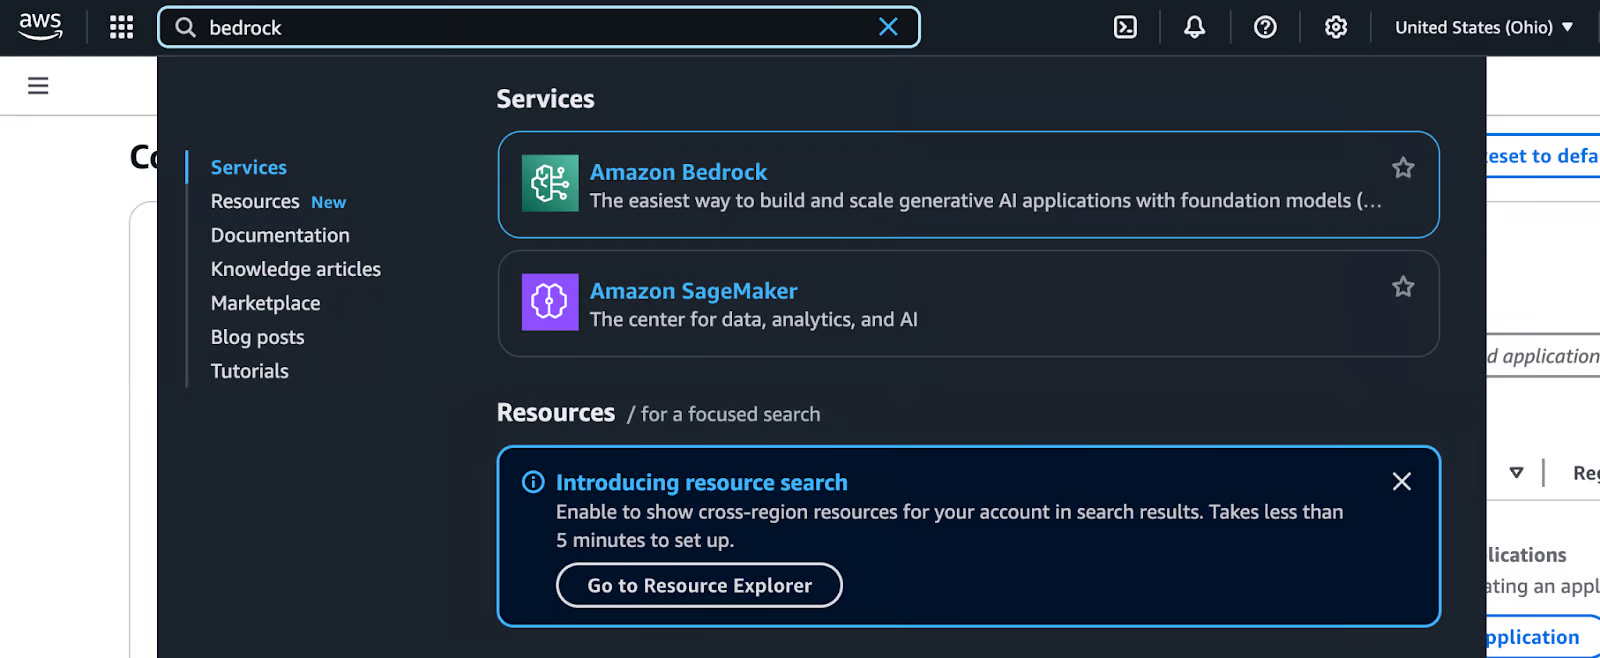

Explore the Bedrock dashboard: Once on the Bedrock dashboard, you’ll see options for choosing model providers and foundation models.

Amazon Bedrock Providers page showcasing serverless model options from Amazon.

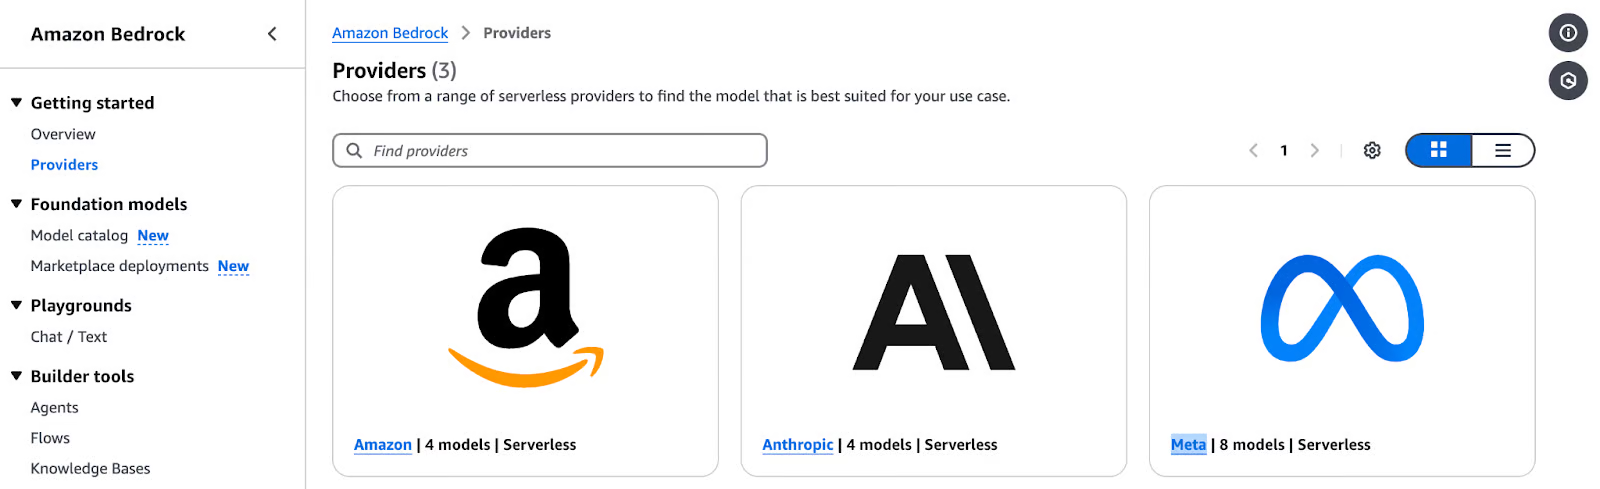

Select a model provider and a foundation model:

1. Choose a provider based on your use case (e.g., Amazon Titan for text generation, Stability AI for images, etc.).

2. Explore model-specific options like input types, supported features, and output parameters.

Run a test inference: AWS Bedrock allows you to run sample inferences directly from the console. This is a great way to get a feel for how each model works before integrating it into your application.

Amazon Bedrock Chat/Text Playground interface.

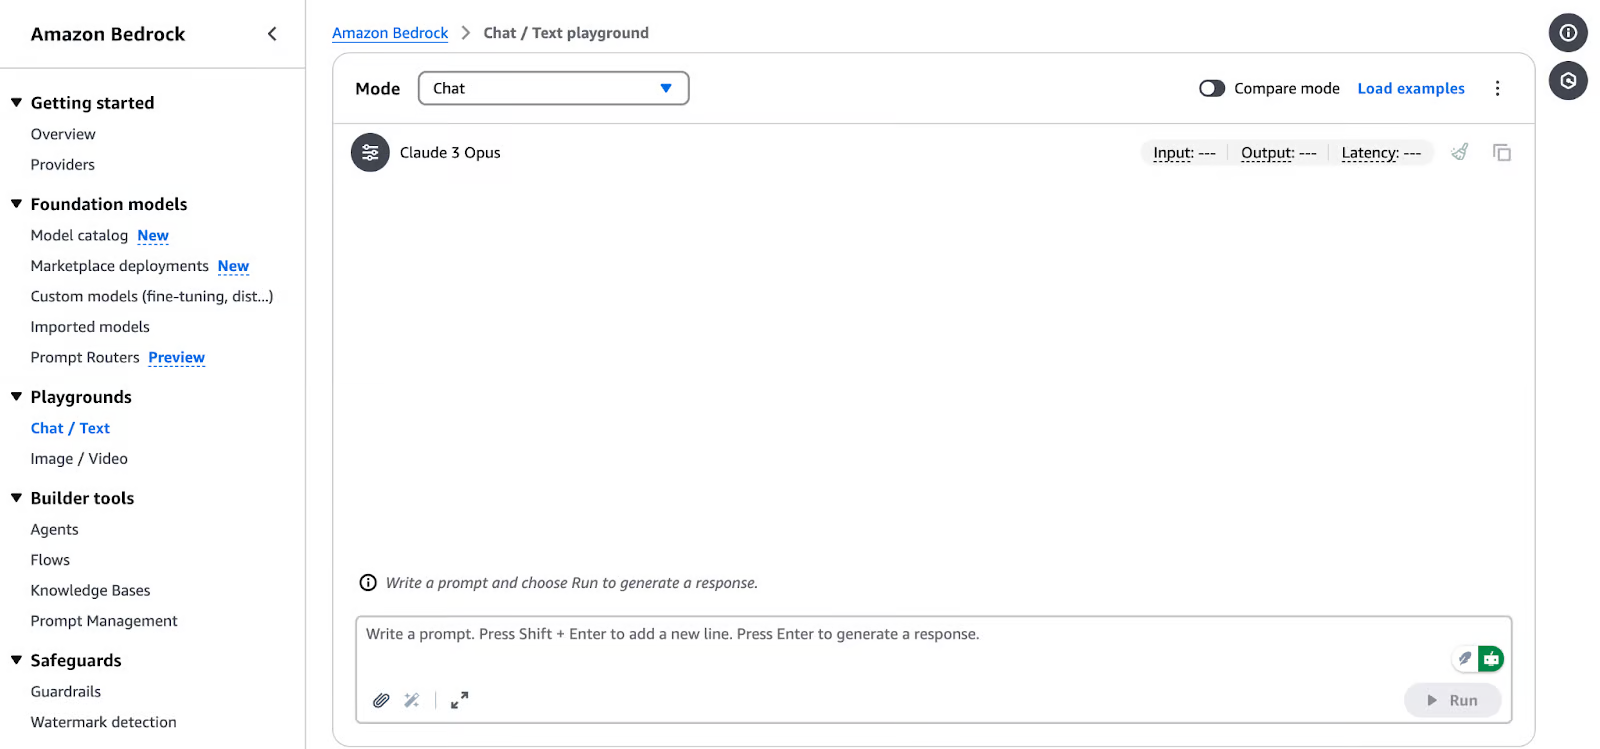

#Step 3: Setting up IAM permissions

AWS Identity and Access Management (IAM) is critical for securely accessing AWS Bedrock. Follow these steps to configure permissions:

1. In the AWS Management Console, navigate to the IAM service.

2. Click Roles in the sidebar and select Create policy.

3. In Specify permissions, choose “JSON”.

AWS IAM Policy Editor in JSON mode

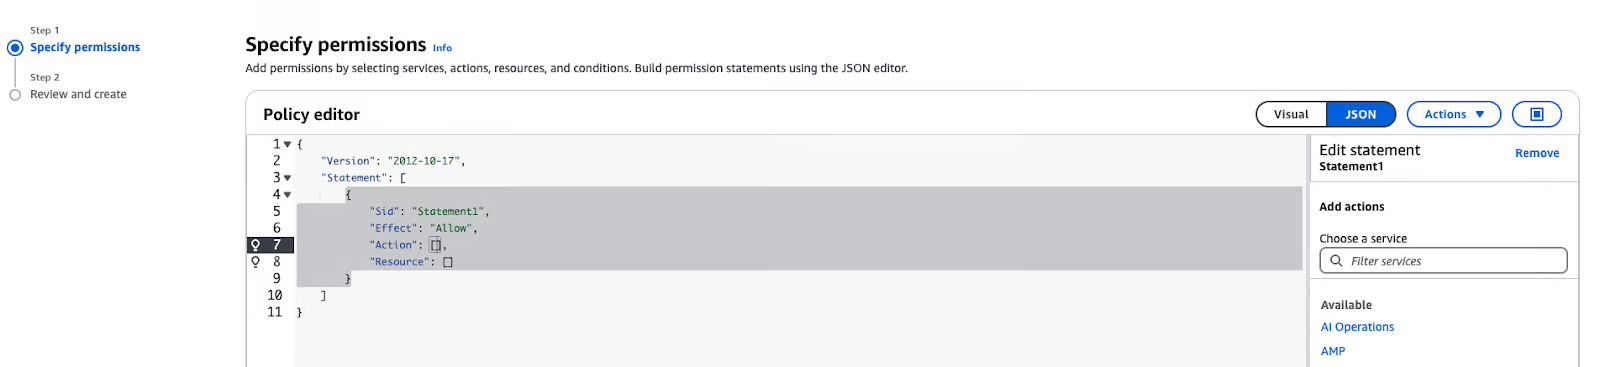

Paste the below policy in the text box:

{
    "Version": "2012-10-17",
    "Statement": [        {
            "Sid": "BedrockFullAccess",
            "Effect": "Allow",
            "Action": ["bedrock:*"],
            "Resource": "*"
        }
    ]
}

Note: The policy above can be attached to any role that needs to access the Amazon Bedrock service. It can be SageMaker or a user. When using Amazon SageMaker, the execution role for your notebook is typically a different user or role than the one you use to log in to the AWS Management Console. To find out how to explore  Amazon Bedrock service using the AWS Console, ensure you authorize your Console user or role. You can run the notebooks from any environment with access to the AWS Bedrock service and valid credentials.

In [ ]:
{
    "Version": "2012-10-17",
    "Statement": [        {
            "Sid": "BedrockFullAccess",
            "Effect": "Allow",
            "Action": ["bedrock:*"],
            "Resource": "*"
        }
    ]
}

#Using Amazon Bedrock for Generative AI Applications

Generative AI applications are built upon foundation models that are fine-tuned for a particular task, such as text generation, image creation, or data transformation. Following is a step-by-step guide on choosing a foundation model, using basic inference jobs, and modifying model responses to suit your needs.

Selecting a foundation model
Picking the right foundation model is important because it depends on what your project needs. Here’s how to make a selection:

1. Identify your use case:

  Text generation: For tasks like  summarization, content creation, or chatbot development, consider models like:

      1. Amazon Titan Text G1: This model generates high-quality text with a good understanding of the context.

      2. Anthropic Claude 3: This model is very good at producing text that is coherent and relevant to the context and is thus suitable for conversational AI applications.

 Image generation: If your project is about creating images or any  form of visual content, then Stability AI models are the way to go:

      1. Stable Diffusion 3.5 Large: This model is very good at generating pictures from text descriptions, whether photorealistic or artistic.

      2. Multimodal tasks: For applications that need both text and image processing, Amazon Nova models are recommended:

          1. Nova Lite: A cost-sensitive multimodal model that can take text, image, and video input and output text.

          2. Nova Pro: A competent multimodal model for more complex tasks.


2. Evaluate model capabilities:

    Review the specific strengths of each model to ensure alignment with your project's needs. Detailed information about supported foundation models, including their capabilities and supported regions, is available in the AWS documentation.

##Enabling model access

Before using these models, you need to enable model access within your AWS account. Here are the steps to set it up:

1. In the Bedrock Console, navigate to Models access.

2. In the Console, click on Modify model access.

3. Browse the available models from providers and select the one you like. In this case, I selected Titan Text G1—Express.

Amazon Bedrock model access management page.

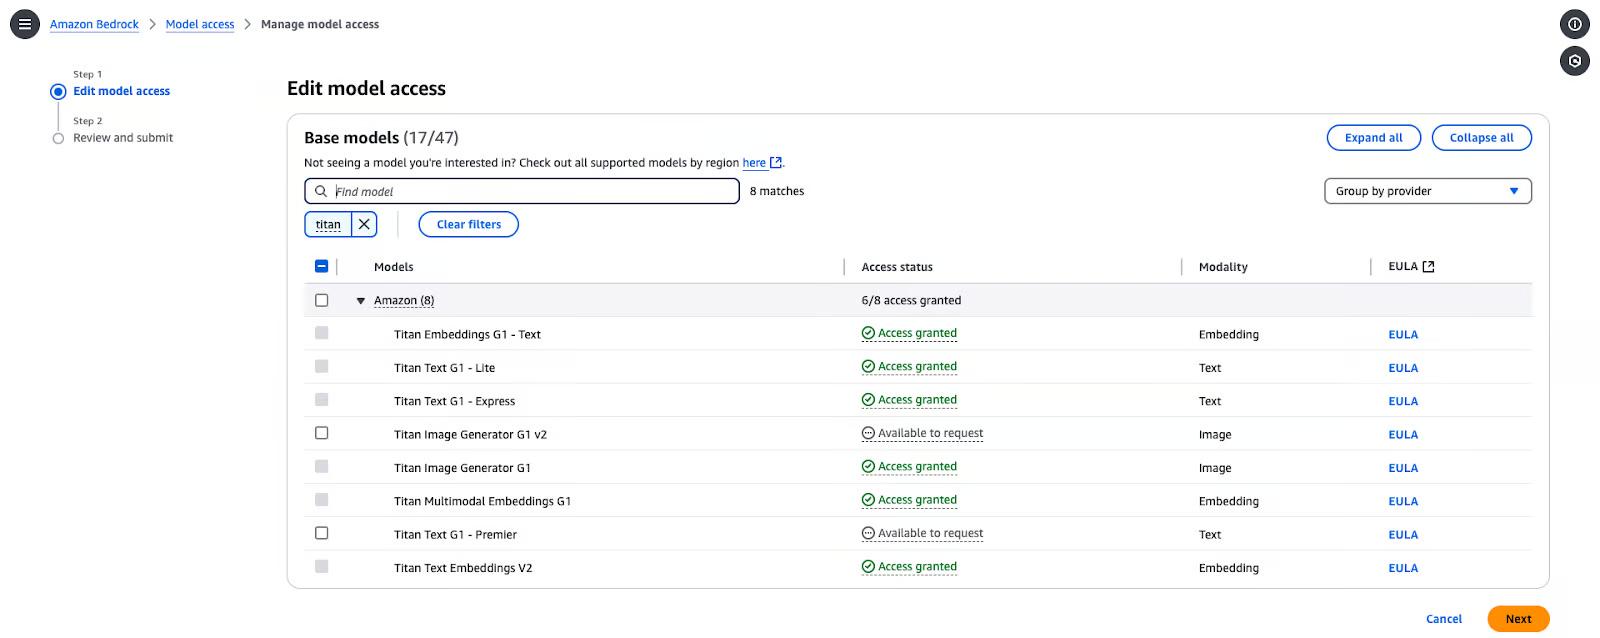

Click Next, and then click on Review and submit.

##Running basic inference

To perform inference using a selected foundation model in AWS Bedrock, follow these steps:

Set up the AWS SDK for Python (boto3):

In [ ]:
pip install boto3

Initialize the Bedrock client: Create a Bedrock runtime client in the AWS region of your choice:

In [ ]:
import boto3
import json
from botocore.exceptions import ClientError

# Set the AWS Region
region = "us-east-1"

# Initialize the Bedrock Runtime client
client = boto3.client("bedrock-runtime", region_name=region)

In [ ]:
#Setup the LLM with AWS Bedrock
def get_bedrock_client(region):
  return boto3.client("bedrock-runtime", region_name=region)

def create_bedrock_llm(client):
  return (model_id='anthropic.claude-3.5-sonnet-20240620-v1:0', client=client, model_kwargs={'temperature': 0}, region_name='us-east-1')


llm= create_bedrock_llm(get_bedrock_client(region='us-east-1'))

Invoke the model: Define the model ID and the input prompt:

In [ ]:
# Define the model ID for Amazon Titan Express v1
model_id = "amazon.titan-text-express-v1"

# Define the input prompt
prompt = """
Command: Compose an email from Tom, Customer Service Manager, to the customer "Nancy"
who provided negative feedback on the service provided by our customer support
Engineer"""

Format the request payload:

In [ ]:
# Configure inference parameters
inference_parameters = {
   "inputText": prompt,
   "textGenerationConfig": {
       "maxTokenCount": 512,  # Limit the response length
       "temperature": 0.5,    # Control the randomness of the output
   },
}

# Convert the request payload to JSON
request_payload = json.dumps(inference_parameters)

Process the response:

In [ ]:
try:
   # Invoke the model
   response = client.invoke_model(
       modelId=model_id,
       body=request_payload,
       contentType="application/json",
       accept="application/json"
   )

   # Decode the response body
   response_body = json.loads(response["body"].read())

   # Extract and print the generated text
   generated_text = response_body["results"][0]["outputText"]
   print("Generated Text:\n", generated_text)

except ClientError as e:
   print(f"ClientError: {e.response['Error']['Message']}")
except Exception as e:
   print(f"An error occurred: {e}")

Note: You can access and copy the complete code directly from the GitHub Gist.

You can expect the below output:

In [ ]:
% python3 main.py

Generated Text:

Tom:
Nancy,

I am writing to express my sincere apologies for the negative experience you had with our customer support engineer. It is unacceptable that we did not meet your expectations, and I want to assure you that we are taking steps to prevent this from happening in the future.

Sincerely,
Tom
Customer Service Manager

##Customizing the model outputs\

To fine-tune the behavior of the model output, you can adjust parameters like temperature and maxTokenCount:

temperature: This parameter controls the randomness of the output. Lower values increase the determination of the output, and higher values increase the variability.

MaxTokenCount: Sets the maximum length of the generated output.
For example:

In [ ]:
inference_parameters = {
   "inputText": prompt,
   "textGenerationConfig": {
       "maxTokenCount": 256,  # Limit the response length
       "temperature": 0.7,    # Control the randomness of the output
   },
}

By adjusting these parameters, you can better tailor the creativity and length of the generated content to your application's needs.